### Подключение библиотек

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras import regularizers
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from keras.utils import pad_sequences
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
NUM_CLASSES = 4

In [ ]:
path = 'drive/Othercomputers/Ноутбук/Artist/'
# path = ''

### Обработка данных для статичного классификатора

In [ ]:
dsopen = np.load(path + 'dataset/open.npy')
dsok = np.load(path + 'dataset/ok.npy')
dsup = np.load(path + 'dataset/up.npy')

In [ ]:
dsall = np.vstack((dsopen, dsup, dsok))
dsall.shape

(3254, 21, 2)

In [ ]:
dsall = (dsall - dsall.min()) / (dsall.max() - dsall.min())

In [ ]:
dsallx = dsall.copy()
dsally = np.array([[1, 0, 0, 0]] * dsopen.shape[0] + [[0, 1, 0, 0]] * dsup.shape[0] + [[0, 0, 1, 0]] * dsok.shape[0], dtype='float32')

In [ ]:
np.save(path + 'dataset/static_X.npy', dsallx)
np.save(path + 'dataset/static_Y.npy', dsally)

###Обработка данных для динамического классификатора

In [ ]:
dsno = np.load(path + 'dataset/no.npy')
dsclick = np.load(path + 'dataset/click.npy')
dsslidel = np.load(path + 'dataset/slide_left.npy')
dsslider = np.load(path + 'dataset/slide_right.npy')

In [ ]:
dsclick = dsclick.reshape((95, 25, 42))
dsslidel = dsslidel.squeeze()
dsslider = dsslider.squeeze()
dsno = dsno.squeeze()

In [ ]:
dsclick = (dsclick - dsclick.min()) / (dsclick.max() - dsclick.min())
dsno = (dsno - dsno.min()) / (dsno.max() - dsno.min())
dsslidel = (dsslidel - dsslidel.min()) / (dsslidel.max() - dsslidel.min())
dsslider = (dsslider - dsslider.min()) / (dsslider.max() - dsslider.min())

In [ ]:
mxlen = max(dsclick.shape[1], dsno.shape[1], dsslidel.shape[1], dsslidel.shape[1])

In [ ]:
if dsslidel.shape[1] < mxlen:
  dsslidel = dsslidel.tolist()
  for i in range(len(dsslidel)):
      ln = len(dsslidel[i]) - 1
      for j in range(mxlen - len(dsslidel[i])):
          dsslidel[i].append(dsslidel[i][ln])
  dsslidel = np.array(dsslidel, dtype='float32')
if dsslider.shape[1] < mxlen:
  dsslider = dsslider.tolist()
  for i in range(len(dsslider)):
      ln = len(dsslider[i]) - 1
      for j in range(mxlen - len(dsslider[i])):
          dsslider[i].append(dsslider[i][ln])
  dsslider = np.array(dsslider, dtype='float32')
if dsno.shape[1] < mxlen:
  dsno = dsno.tolist()
  for i in range(len(dsno)):
      ln = len(dsno[i]) - 1
      for j in range(mxlen - len(dsno[i])):
          dsno[i].append(dsno[i][ln])
  dsno = np.array(dsno, dtype='float32')
if dsclick.shape[1] < mxlen:
  dsclick = dsclick.tolist()
  for i in range(len(dsclick)):
      ln = len(dsclick[i]) - 1
      for j in range(mxlen - len(dsclick[i])):
          dsclick[i].append(dsclick[i][ln])
  dsclick = np.array(dsclick, dtype='float32')

In [ ]:
dsslidel[i] = np.append(dsslidel[i], np.expand_dims(dsslidel[i][ln], 0), axis=0)

ValueError: could not broadcast input array from shape (15,42) into shape (14,42)

In [ ]:
np.append(dsslidel[i], np.expand_dims(dsslidel[i][ln], 0), axis=0).shape

(15, 42)

In [ ]:
X = np.vstack((dsno, dsslidel, dsslider, dsclick))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 25 and the array at index 1 has size 14

### Обучение модели

In [ ]:
model_path = path + '/mlmodels/static'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dsallx, dsally, test_size = 0.3)

In [ ]:
dsallx.shape

(3254, 21, 2)

In [ ]:
model = Sequential([
    Conv1D(60, 2, activation='relu', input_shape = x_train.shape[1:], kernel_regularizer = regularizers.L2(4e-4)),
    Conv1D(50, 2, activation='relu', kernel_regularizer = regularizers.L2(4e-4)),
    # MaxPooling1D(2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    x_train, y_train,
    epochs = 20,
    validation_data=(x_test, y_test)
)

Epoch 1/20
72/72 [==============================] - 3s 11ms/step - loss: 0.8400 - accuracy: 0.6566 - val_loss: 0.3258 - val_accuracy: 0.9969
Epoch 2/20
72/72 [==============================] - 1s 7ms/step - loss: 0.1353 - accuracy: 0.9930 - val_loss: 0.0660 - val_accuracy: 0.9928
Epoch 3/20
72/72 [==============================] - 0s 7ms/step - loss: 0.0571 - accuracy: 0.9930 - val_loss: 0.0394 - val_accuracy: 0.9959
Epoch 4/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0484 - accuracy: 0.9917 - val_loss: 0.0523 - val_accuracy: 0.9918
Epoch 5/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0506 - accuracy: 0.9903 - val_loss: 0.0534 - val_accuracy: 0.9928
Epoch 6/20
72/72 [==============================] - 1s 8ms/step - loss: 0.0465 - accuracy: 0.9917 - val_loss: 0.0446 - val_accuracy: 0.9918
Epoch 7/20
72/72 [==============================] - 1s 7ms/step - loss: 0.0409 - accuracy: 0.9965 - val_loss: 0.0421 - val_accuracy: 0.9939
Epoch 8/20
72/72 [=

In [ ]:
model.save(model_path)

### Stable Diffusion

In [2]:
%pip install diffusers transformers accelerate

In [1]:
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
import numpy as np
from imageio import imread
from diffusers.utils import load_image

image = Image.open('img.png')

/home/olegg/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-scribble", torch_dtype=torch.float32
).to('cuda')

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float32
).to('cuda')

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

/home/olegg/.local/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 16.08it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/di

100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


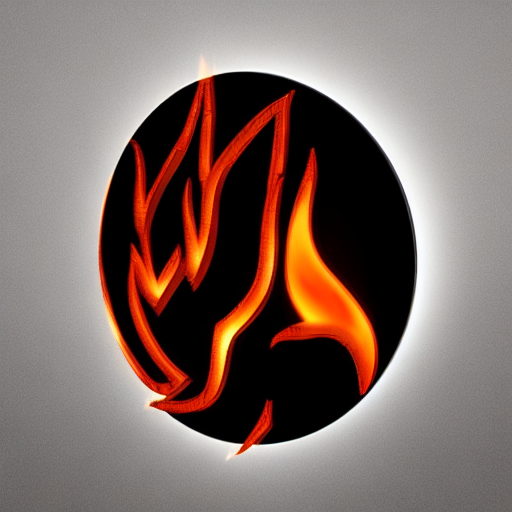

In [4]:
imgs = pipe("fire sign, sign design, one color, black background", image, negative_prompt = "many lines, many colors, many details", num_inference_steps=10, height=512, width=512).images
imgs[0]